# Project Assignment September Call, A.Y. 2022/2023

In [3]:
import pandas as pd

df_dev = pd.read_csv("fall_project_dataset/development.csv", index_col=0)
df_eval = pd.read_csv("fall_project_dataset/evaluation.csv", index_col=0)

df_dev.head()

,COW,SCHL,MAR,OCCP,POBP,WKHP,SEX,RAC1P,MIG,HICOV,...,DEAR,MIL,MIGSP,FER,ENG,JWAP,JWDP,OC,FDEYEP,JWMNP
Id,,,,,,,,,,,,,,,,,,,,,
0,1.0,19.0,5.0,4200.0,6.0,60.0,1.0,1.0,1.0,1.0,...,2.0,4.0,0.0,0.0,0.0,79.0,25.0,0.0,0.0,75.0
1,1.0,16.0,5.0,4720.0,6.0,35.0,1.0,9.0,1.0,2.0,...,2.0,4.0,0.0,0.0,2.0,156.0,97.0,0.0,0.0,10.0
2,7.0,22.0,1.0,4920.0,6.0,50.0,2.0,1.0,1.0,1.0,...,2.0,4.0,0.0,0.0,0.0,107.0,67.0,0.0,0.0,5.0
3,1.0,21.0,1.0,1460.0,6.0,40.0,1.0,1.0,1.0,1.0,...,2.0,4.0,0.0,0.0,0.0,107.0,61.0,0.0,0.0,35.0
4,1.0,18.0,5.0,4720.0,6.0,40.0,1.0,6.0,1.0,1.0,...,2.0,4.0,0.0,0.0,0.0,68.0,28.0,0.0,0.0,5.0


In [4]:
df = pd.concat([df_dev, df_eval], sort=False)
len(df_dev), len(df_eval), len(df)

(104642, 26160, 130802)

In [5]:
df.isna().any(axis=0)

COW       False
SCHL      False
MAR       False
OCCP      False
POBP      False
WKHP      False
SEX       False
RAC1P     False
MIG       False
HICOV     False
LANP      False
PAOC      False
PINCP     False
PUBCOV    False
VPS       False
DEAR      False
MIL       False
MIGSP     False
FER       False
ENG       False
JWAP      False
JWDP      False
OC        False
FDEYEP    False
JWMNP      True
dtype: bool

This shows us that no value is missing for all the fields

In [6]:
df_1h = pd.get_dummies(df, columns=['FDEYEP', 'ENG', 'OC', 'COW', 'HICOV', 'LANP', 'FER', 'MIGSP', 'SCHL', 'MIG', 'VPS', 'MIL', 'MAR', 'OCCP', 'PAOC', 'PUBCOV', 'DEAR', 'JWAP', 'JWDP', 'POBP', 'SEX', 'RAC1P'])

In [7]:
df.shape, df_1h.shape

((130802, 25), (130802, 1494))

In [10]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/36/60b58b6199547b7b46be03e05508d053162fbce146639bfc65609fa49b23/scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/2a/12/62804d63514ecd9d2ecb73497c3e38094f9139bc60b0353b653253d106bb/scipy-1.11.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.5/146.5 kB 2.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
from sklearn.model_selection import train_test_split
# drop unused columns
df_dropped = df_1h#.drop(columns=["Id"])
# define the mask for the training/validation samples (those with a price, the others will belong to the test set)
train_valid_mask = ~df_dropped["JWMNP"].isna()
# extract the feature names (for later use)
feature_names = df_dropped[train_valid_mask].drop(columns=["JWMNP"]).columns

X = df_dropped.drop(columns=["JWMNP"]).values
y = df_dropped["JWMNP"].values

X_train_valid = X[train_valid_mask]
y_train_valid = y[train_valid_mask]
X_test = X[~train_valid_mask]
y_test = y[~train_valid_mask]

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

forest = RandomForestRegressor(10, random_state=42)
forest.fit(X_train , y_train)

KeyboardInterrupt: 

In [ ]:
forest.score(X_test , y_test)

ValueError: Input contains NaN.

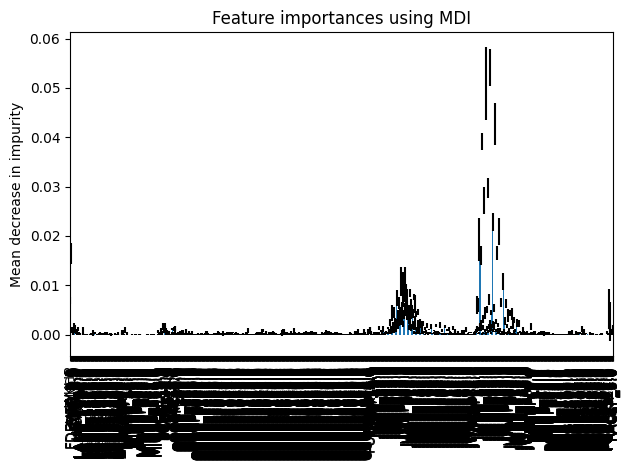

In [65]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


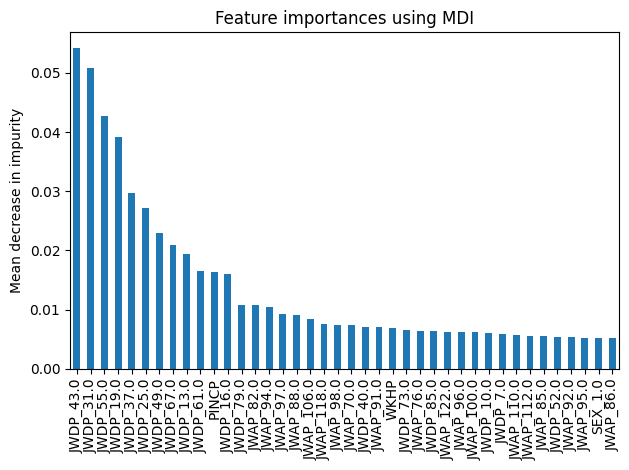

In [79]:
fig, ax = plt.subplots()
roba = forest_importances.sort_values(ascending=False).head(40)
roba.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [54]:
y_pred = reg.predict(X_valid)
r2_score(y_valid, y_pred)

0.7139275631878397

In [57]:
y_pred

array([15. , 25. , 32.5, ..., 10.2, 17.4, 20.8])

In [60]:
f1_score(y_valid, np.rint(y_pred), average='macro')

0.09186454914219166

# Test con regressione lineare

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train , y_train)
reg.score(X_train , y_train)

0.8055138713162142

In [28]:
reg.coef_

array([ 6.84884404e-03,  6.93334781e-07, -1.77274643e+07, ...,
        1.43415301e+06,  1.43415266e+06,  1.43415244e+06])

In [29]:
reg.intercept_

80952710.74678071

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
y_pred = reg.predict(X_valid)
r2_score(y_valid, y_pred)

-90558.03389051351

In [45]:
import numpy as np
f1_score(y_valid, np.rint(y_pred), average='macro')

0.019349083782736316

In [47]:
y_valid

array([ 15.,  25.,  55., ...,  12., 141.,  29.])

In [48]:
y_pred, np.rint(y_pred)

(array([16.28877269, 24.07209882, 52.31907588, ..., 11.36334607,
        27.60787663, 54.44423334]),
 array([16., 24., 52., ..., 11., 28., 54.]))